In [1]:
import collections
import random

import pandas
import numpy

from tcp_fits import Call

from tcp_fits import series_fits

In [2]:
index = numpy.arange(0, 15, 0.2)
std = 15
frame = series_fits.FittingFrame({
    'second': [random.gauss(1 + x**2/2, std) for x in index],
    'third': [random.gauss(1 + x**2/2 - x**3/6, std) for x in index],
    'fourth': [random.gauss(1 + x**2/2 - x**3/6 + x**4/24, std) for x in index],
}, index=index)
frame.fit(second=[Call('polynomial', *[1, 2])],
          third=[Call('polynomial', *[1, 2, 3])],
          fourth=[Call('polynomial', *[1, 2, 3, 4])])

In [3]:
frame.fits

,key,fit,degree,cost
0,second,(3.2 ± 4.5) + (-1.3 ± 1.4)x + (0.622 ± 0.091)x^2,2,4.628408
1,second,(-21.1 ± 4.0) + (8.08 ± 0.46)x,1,5.946979
2,third,(7.1 ± 6.5) + (-1.5 ± 4.0)x + (0.62 ± 0.64)x^2...,3,5.270268
3,third,(-17.5 ± 6.5) + (20.8 ± 2.1)x + (-3.19 ± 0.14)x^2,2,6.764906
4,third,(92 ± 14) + (-25.5 ± 1.6)x,1,20.157826
5,fourth,(3.0 ± 7.3) + (-2.8 ± 6.9)x + (0.7 ± 1.9)x^2 +...,4,4.642472
6,fourth,(-33.1 ± 8.8) + (37.0 ± 5.2)x + (-10.73 ± 0.82...,3,5.882217
7,fourth,(138 ± 24) + (-102.2 ± 7.8)x + (12.54 ± 0.51)x^2,2,24.693639
8,fourth,(-309 ± 52) + (82.9 ± 6.2)x,1,79.172271


In [4]:
assert [list(frame.fits[frame.fits.key == 'second']['degree']),
        list(frame.fits[frame.fits.key == 'third']['degree']),
        list(frame.fits[frame.fits.key == 'fourth']['degree'])
       ] == [[2, 1], [3, 2, 1], [4, 3, 2, 1]]

In [5]:
frame.best_fits

,fit,degree,cost
second,(3.2 ± 4.5) + (-1.3 ± 1.4)x + (0.622 ± 0.091)x^2,2,4.628408
third,(7.1 ± 6.5) + (-1.5 ± 4.0)x + (0.62 ± 0.64)x^2...,3,5.270268
fourth,(3.0 ± 7.3) + (-2.8 ± 6.9)x + (0.7 ± 1.9)x^2 +...,4,4.642472


In [6]:
assert list(frame.best_fits['degree'].items()) == [('second', 2), ('third', 3), ('fourth', 4)], \
        f'Actual fits: {profile.best_fits}'

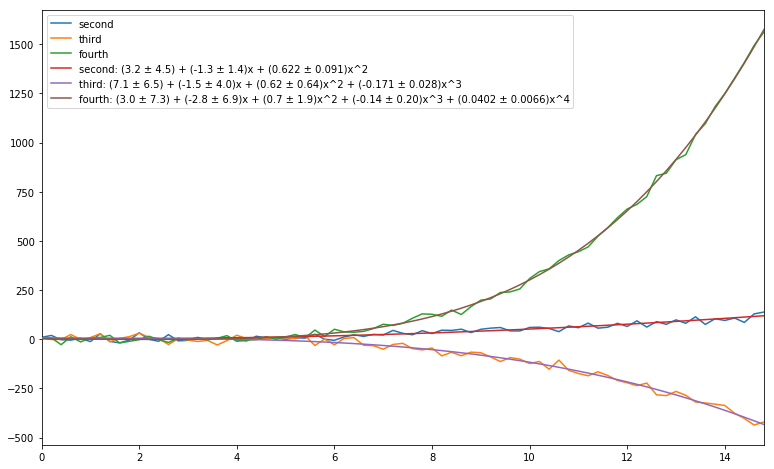

In [7]:
frame.show()